In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
X=np.linspace(-2,3,20)
Y=np.linspace(-2,3,20)
x,y=np.meshgrid(X,Y)

In [19]:
z =  3*(1-x)**2.*np.exp(-(x**2) - (y+1)**2)- 10*(x/5. - x**3 - y**5)*np.exp(-x**2-y**2)- 1./3*np.exp(-(x+1)**2 - y**2) 
 

In [24]:
zz=np.tile(z,(5,10))

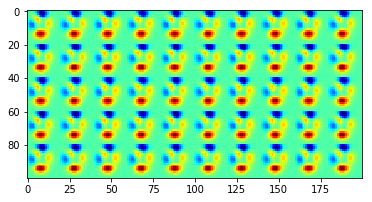

In [34]:
plt.imshow(zz,cmap='jet')

In [39]:
mag_loss=690.6
rotor_loss=49.46
stator_loss=412.32
copper_loss=3037.57
out_p=2*np.pi*(1200/60.)*1550
iron_loss=stator_loss+rotor_loss
eff=100*(out_p-stator_loss-rotor_loss)/(out_p+copper_loss+mag_loss)
print(eff)
print(out_p)
print(iron_loss)

97.8892674796
194778.744523
461.78


In [40]:
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from matplotlib import cm
from scipy.fftpack import fft,fft2,fftshift
mu0=4*np.pi*1e-7

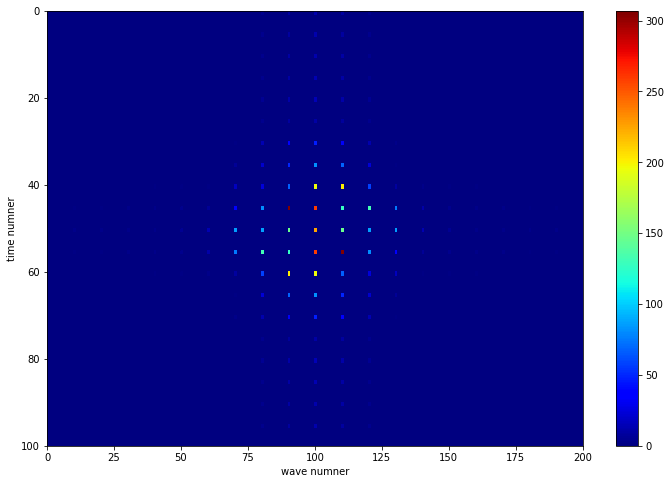

In [50]:
ps=zz
ffs=np.fft.fftshift(abs(np.fft.fftn(ps)))*2/len(ps)
Nx,Nt=ffs.shape
Nx=int(Nx);Nt=int(Nt)
waveno=18
timeno=10

f=np.fft.fftshift(np.fft.fftfreq(Nx,1./Nx))
f.astype(int)
k=np.fft.fftshift(np.fft.fftfreq(Nt,1./Nt))
fcent=int(np.argwhere(f==0))
kcent=int(np.argwhere(k==0))
ff=f[fcent-timeno:fcent+timeno]
kk=k[kcent-waveno:kcent+waveno]
aaa=-np.arange(ff[0],ff[-1]+1,dtype=np.int)
bbb=np.arange(kk[0],kk[-1]+1,dtype=np.int)

sffs=ffs[fcent-timeno:fcent+timeno,kcent-waveno:kcent+waveno]
sffs[sffs<0.1]=0#;sffs[fcent,kcent]
#ffs=np.log(ffs/np.max(ffs)*100)
fig, ax = plt.subplots()
fig.set_size_inches((12,8))
plt.pcolor(ffs,cmap=cm.jet,) #,cmap='tab20'
plt.xlabel('wave numner',fontsize=10)
plt.ylabel('time numner',fontsize=10)

plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

In [42]:
Nx

200